In [1]:
import pandas as pd
import numpy as np
import igraph.test
from igraph import *
import csv
import numpy as np
import networkx as nx
import operator
import copy
from IPython.core.display import display, SVG
import math
from textblob import TextBlob
import numpy
from matplotlib import pyplot

# #AmazonFires
160 users <br>
181 tweets over 4 days <br>
Wildfires in Amazon forest from August 15th to 22nd of 2019

In [2]:
follower_data =  pd.read_csv(r"./Dataset/#AmazonFires_follower_followee_network.csv", encoding="utf-8")

In [3]:
tweet_data = pd.read_csv(r"./Dataset/#AmazonFires_tweets.csv", encoding="utf-8")

In [4]:
tweet_data["user_id"] = tweet_data["user_id"].apply(lambda x: (x[1:]))
uids = tweet_data["user_id"]
unique_uids = uids.unique()

In [5]:
follower_data['user_id'] = unique_uids

In [6]:
follower_data["followerIDs"] = follower_data["followerIDs"].fillna("")

In [7]:
to_lst = lambda x:np.asarray(x.split(", "))
follower_data["followerIDs_lst"] = follower_data["followerIDs"].apply(to_lst)

In [8]:
common = lambda x:np.intersect1d(x,unique_uids)
follower_data["req_followerIDs_lst"] = follower_data["followerIDs_lst"].apply(common)

In [9]:
tweet_data["retweet_user_id"] = tweet_data["retweet_user_id"].fillna("").apply(lambda x: (x[1:]))

In [10]:
tweet_data["user_id"] = tweet_data["user_id"].fillna("")

In [11]:
follower_edge_list = []
for i in range(len(follower_data)):
    for follower in follower_data["req_followerIDs_lst"][i]:
        follower_edge_list.append((follower,follower_data["user_id"][i]))

In [12]:
follower_followee_graph = igraph.Graph.TupleList(follower_edge_list, directed = True)
follower_followee_graph.deg = [i+5 for i in follower_followee_graph.indegree()] 

In [13]:
follower_followee_graph.id = [v["name"] for v in follower_followee_graph.vs]
follower_followee_graph.name_obj = []
for uid in follower_followee_graph.id: 
    follower_followee_graph.name_obj.append(follower_data.loc[follower_data['user_id'] == uid, 'screen_name'])

follower_followee_graph.name = []
for name in follower_followee_graph.name_obj:
    if(name.empty):
        follower_followee_graph.name.append("nan")
    else:
        follower_followee_graph.name.append(name.values[0])
layout = follower_followee_graph.layout("star")

# Follower Followee Network
Nodes are Users<br>
Edge from i to j means i follows j<br>
Main Influencers are the ones with High Degree Centrality.They are AmazonWatch and herbivore_club<br>
Size of node in the plot is it's indegree

In [14]:
out = plot(follower_followee_graph,vertex_size=follower_followee_graph.deg,vertex_label=follower_followee_graph.name,vertex_label_size=(follower_followee_graph.deg),edge_arrow_size=0.5)
out.save('Outputs/DS2.1.1.png')

<img src="Outputs/DS2.1.1.png">

In [15]:
community = follower_followee_graph.community_walktrap()

# Communities

Community detection based on random walks<br>
Two main influencers are part of same community<br>
This is because there are no two sides of the case and all followers follow both influencers

In [16]:
out = plot(community.as_clustering(),edge_arrow_size=0.6,vertex_label=follower_followee_graph.name,vertex_label_size=follower_followee_graph.deg)
out.save('Outputs/DS2.1.2.png')

<img src="Outputs/DS2.1.2.png">

In [17]:
edge_list_tweets_existing = []
common_users = list(set(unique_uids))
for i in range(len(tweet_data)):
    if tweet_data.iloc[i]["retweet_user_id"] in common_users : edge_list_tweets_existing.append((tweet_data.iloc[i]["retweet_user_id"],tweet_data.iloc[i]["user_id"]))

In [18]:
Gm = igraph.Graph.TupleList(edge_list_tweets_existing, directed = True)
Gm.deg = [2*i+5 for i in Gm.outdegree()]

In [19]:
Gm.id = [v["name"] for v in Gm.vs]

Gm.name = []
for i in range(len(Gm.id)):
    uid = Gm.id[i]
    name = follower_data.loc[follower_data['user_id'] == uid, 'screen_name']
    if(Gm.deg[i]==0):
        Gm.name.append("")
    elif(name.empty):
        Gm.name.append("nan")
    else:
        Gm.name.append(name.values[0])

# Retweet Network
Nodes are Users<br>
Edge from i to j means i follows j<br>
Most retweeted users are AmazonWatch and herbivore_club<br>
## Follower followee vs retweet network
The two main influencers tweets aren the ones which got retweeted maximum<br>
## Reachability
Reachability of both is same as their out degree.

In [20]:
out = plot(Gm,vertex_size=Gm.deg,vertex_label=Gm.name,vertex_label_size = Gm.deg)
out.save("Outputs/DS2.2.png")

<img src="Outputs/DS2.2.png">

In [21]:
tweet_data1 = tweet_data.loc[(tweet_data['created_at'] >= '2019-11-21 00:00:00') & (tweet_data['created_at'] < '2019-11-22 00:00:00')]
tweet_data2 = tweet_data.loc[(tweet_data['created_at'] >= '2019-11-21 00:00:00') & (tweet_data['created_at'] < '2019-11-23 00:00:00')]
tweet_data3 = tweet_data.loc[(tweet_data['created_at'] >= '2019-11-21 00:00:00') & (tweet_data['created_at'] < '2019-11-24 00:00:00')]
tweet_data4 = tweet_data.loc[(tweet_data['created_at'] >= '2019-11-21 00:00:00') & (tweet_data['created_at'] < '2019-11-25 00:00:00')]

In [22]:
edge_list_tweets_1 = []
for i in range(len(tweet_data1)):
    if tweet_data.iloc[i]["retweet_user_id"]!= "" : edge_list_tweets_1.append((tweet_data.iloc[i]["retweet_user_id"],tweet_data.iloc[i]["user_id"]))

In [23]:
retweet_graph_1 = igraph.Graph.TupleList(edge_list_tweets_1, directed = True)
retweet_graph_1.id = [v["name"] for v in retweet_graph_1.vs]

In [24]:
edge_list_tweets_2 = []
for i in range(len(tweet_data2)):
    if tweet_data.iloc[i]["retweet_user_id"]!= "" : edge_list_tweets_2.append((tweet_data.iloc[i]["retweet_user_id"],tweet_data.iloc[i]["user_id"]))

In [25]:
retweet_graph_2 = igraph.Graph.TupleList(edge_list_tweets_2, directed = True)
retweet_graph_2.id = [v["name"] for v in retweet_graph_2.vs]

In [26]:
edge_list_tweets_3 = []
for i in range(len(tweet_data3)):
    if tweet_data.iloc[i]["retweet_user_id"]!= "" : edge_list_tweets_3.append((tweet_data.iloc[i]["retweet_user_id"],tweet_data.iloc[i]["user_id"]))

In [27]:
retweet_graph_3 = igraph.Graph.TupleList(edge_list_tweets_3, directed = True)

retweet_graph_3.id = [v["name"] for v in retweet_graph_3.vs]

In [28]:
edge_list_tweets_4 = []
for i in range(len(tweet_data4)):
    if tweet_data.iloc[i]["retweet_user_id"]!= "" : edge_list_tweets_4.append((tweet_data.iloc[i]["retweet_user_id"],tweet_data.iloc[i]["user_id"]))

In [29]:
retweet_graph_4 = igraph.Graph.TupleList(edge_list_tweets_4, directed = True)

retweet_graph_4.id = [v["name"] for v in retweet_graph_4.vs]
col=[]
for i in retweet_graph_4.id:
    if(i in set(retweet_graph_1.id)):
        col.append('red')
    elif(i in set(retweet_graph_2.id)):
        col.append('blue')
    elif(i in set(retweet_graph_3.id)):
        col.append('green')
    else:
        col.append('yellow')        

# Analysis over time
## Retweet network
Day 1 - Red<br>
Day 2 - Blue<br>
Day 3 - Green<br>
Day 4 - Yellow<br>
## Communities growing over time
Independent of the day which the original tweet was tweeted, communities are growing, which means the topic is trending for long time

In [30]:
out = plot(retweet_graph_4,vertex_size=10,vertex_color=col)
out.save('Outputs/DS2.3.png')

<img src="Outputs/DS2.3.png">

In [31]:
required_follower_data = follower_data[follower_data['screen_name']=='AmazonWatch'] 

In [32]:
required_follower_data1 = follower_data[follower_data['screen_name']=='herbivore_club'] 

In [33]:
required_follower_data = required_follower_data.append(required_follower_data1)

In [34]:
AmazonWatch = tweet_data[tweet_data['screen_name']=='AmazonWatch']['text'].iloc[0]
AmazonWatch_sentiment = TextBlob(AmazonWatch).sentiment
AmazonWatch_followers = follower_data[follower_data['screen_name']=='AmazonWatch']['req_followerIDs_lst'].iloc[0]
AmazonWatch_sentiment_lst = []
for i in range(len(AmazonWatch_followers)):
    txt = tweet_data[tweet_data['user_id']==AmazonWatch_followers[i]]['text'].iloc[0]
    AmazonWatch_sentiment_lst.append(TextBlob(txt).sentiment)

In [35]:
herbivore_club = tweet_data[tweet_data['screen_name']=='herbivore_club']['text'].iloc[0]
herbivore_club_sentiment = TextBlob(herbivore_club).sentiment
herbivore_club_followers = follower_data[follower_data['screen_name']=='herbivore_club']['req_followerIDs_lst'].iloc[0]
herbivore_club_sentiment_lst = []
for i in range(len(herbivore_club_followers)):
    txt = tweet_data[tweet_data['user_id']==herbivore_club_followers[i]]['text'].iloc[0]
    herbivore_club_sentiment_lst.append(TextBlob(txt).sentiment)

# Sentiments of Influencers Vs Propagators
Main Influencers - AmazonWatch and herbivore_club<br>
## AmazonWatch
Sentiment of some of the followers are deviating from his sentiment
## herbivore_club
Sentiment of some of the followers are deviating from his sentiment
## Plot
Y axis - Polarity (-1 very negative to +1 very positive)<br>
Blue line is sentiment of influencer<br>
Red dots are sentiments of propogators<br>

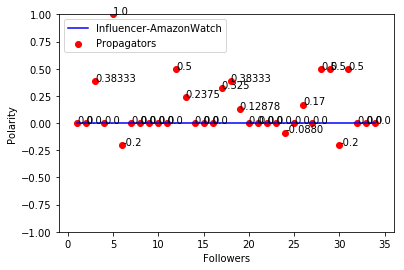

In [36]:
x = numpy.array(range(1,len(AmazonWatch_sentiment_lst)+1))
y1 = numpy.array([AmazonWatch_sentiment.polarity]*(len(AmazonWatch_sentiment_lst)))
y2 = numpy.array([x.polarity for x in AmazonWatch_sentiment_lst])

fig = pyplot.figure()
ax = fig.add_subplot(111)
ax.set_ylim(-1,1)
pyplot.xlabel('Followers')
pyplot.ylabel('Polarity')

pyplot.plot(x,y1,label="Influencer-AmazonWatch",color='b')
# ax.annotate(str(0),xy=(0,0))
# for i,j in zip(x,y1):
#     ax.annotate(str(j),xy=(i,j))

pyplot.scatter(x,y2,label="Propagators",color='r')
for i,j in zip(x,y2):
    ax.annotate(str(j)[:7],xy=(i,j))
    
pyplot.legend(loc="upper left")

pyplot.savefig('Outputs/DS2.4.1.png')

<img src="Outputs/DS2.4.1.png">

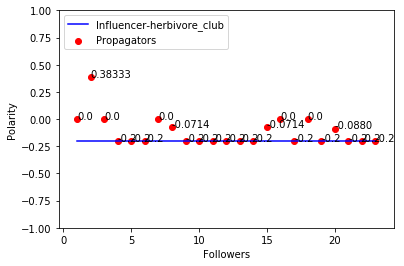

In [37]:
x = numpy.array(range(1,len(herbivore_club_sentiment_lst)+1))
y1 = numpy.array([herbivore_club_sentiment.polarity]*(len(herbivore_club_sentiment_lst)))
y2 = numpy.array([x.polarity for x in herbivore_club_sentiment_lst])

fig = pyplot.figure()
ax = fig.add_subplot(111)
ax.set_ylim(-1,1)
pyplot.xlabel('Followers')
pyplot.ylabel('Polarity')

pyplot.plot(x,y1,label="Influencer-herbivore_club",color='b')
# ax.annotate(str(0),xy=(0,0))
# for i,j in zip(x,y1):
#     ax.annotate(str(j),xy=(i,j))

pyplot.scatter(x,y2,label="Propagators",color='r')
for i,j in zip(x,y2):
    ax.annotate(str(j)[:7],xy=(i,j))
    
pyplot.legend(loc="upper left")

pyplot.savefig('Outputs/DS2.4.2.png')

<img src="Outputs/DS2.4.2.png">